# KNN on Thyroid data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Load Data & preprocessing

In [4]:
df = pd.read_csv("thyroid.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061,0.006,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029,0.015,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.029,0.019,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114,0.003,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049,0.003,0.005,0.116,0.004,o


In [33]:
def get_excel_columns(n_cols):
    col_list = []
    n = n_cols
    alpha_list = [chr(c) for c in range(ord('A'), ord('Z') + 1)]
    alpha_list.insert(0,'dummy')
    for i in range(1,n+1):
        col_i = ""
        index_list=[]
        p=[]
        while i>26:
            k = i%26
            i = i//26
            if k==0:
                index_list.append(26)
                i = i-1
            else:
                index_list.append(k)
        index_list.append(int(i))
        index_list.reverse()
        for i in index_list:
            p.append(alpha_list[i])
            col_i = "".join(p)
        col_list.append(col_i)
    return col_list

In [39]:
df.columns = get_excel_columns(len(df.columns))
print(df.shape)
df.head()

(6916, 22)


,A,B,C,D,E,F,G,H,I,J,...,M,N,O,P,Q,R,S,T,U,V
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061,0.006,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029,0.015,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.029,0.019,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114,0.003,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049,0.003,0.005,0.116,0.004,o


## Now... the real sh**

### Train - Test Split

In [37]:
X = df[get_excel_columns(len(df.columns)-1)].values.astype(float)
X[0:5]

array([[0.45 , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.061, 0.006,
        0.023, 0.087, 0.026],
       [0.61 , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.029, 0.015,
        0.061, 0.096, 0.064],
       [0.16 , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.029, 0.019,
        0.058, 0.103, 0.056],
       [0.85 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.114, 0.003,
        0.024, 0.061, 0.039],
       [0.75 , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.049, 0.003,
        0.005, 0.116, 0.004]])

In [48]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.37381409,  1.50050924, -0.39440532, -0.12595114, -0.11547005,
        -0.1996087 , -0.10680283, -0.12050941, -0.13060943, -0.25875595,
        -0.27309428, -0.11482544, -0.09275961, -0.16159443, -0.01202552,
        -0.22878653,  3.53097966, -1.89580666, -2.49798316, -0.55943924,
        -2.52374039],
       [ 0.47207276, -0.66644042, -0.39440532, -0.12595114, -0.11547005,
         5.00980171, -0.10680283, -0.12050941, -0.13060943, -0.25875595,
        -0.27309428, -0.11482544, -0.09275961, -0.16159443, -0.01202552,
        -0.22878653,  1.56865643, -0.69296527, -1.41857341, -0.08886888,
        -1.44467614],
       [-1.90698403, -0.66644042,  2.53546276, -0.12595114, -0.11547005,
        -0.1996087 , -0.10680283, -0.12050941, -0.13060943, -0.25875595,
        -0.27309428, -0.11482544, -0.09275961,  6.18833213, -0.01202552,
        -0.22878653,  1.56865643, -0.15836909, -1.50378997,  0.27713029,
        -1.67184756],
       [ 1.74090305, -0.66644042, -0.39440532, -0.12595114

In [49]:
y = df.iloc[:,-1]
y[0:5]
len(y)

6916

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (5532, 21) (5532,)
Test set:  (1384, 21) (1384,)


## Classification using KNN

In [51]:
error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train, y_train)
    y_hat = KNN.predict(X_test)
    error_rate.append(np.mean(y_hat != y_test))
error_rate

[0.02601156069364162,
 0.026734104046242775,
 0.02601156069364162,
 0.025289017341040464,
 0.025289017341040464,
 0.02601156069364162,
 0.026734104046242775,
 0.026734104046242775,
 0.02601156069364162,
 0.02601156069364162,
 0.02601156069364162,
 0.02601156069364162,
 0.02601156069364162,
 0.02601156069364162,
 0.02601156069364162,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.026734104046242775,
 0.02745664739884393,
 0.026734104046242775,
 0.02745664739884393,
 0.02745664739884393,
 0.02745664739884393,
 0.02745664739884393,
 0.02745664739884393,
 0.02745664739884393]

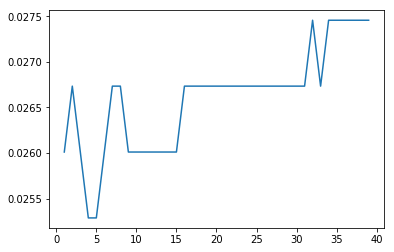

In [52]:
lmao = sns.lineplot(range(1,40), error_rate, markers = True, dashes = False)

### Best K value  = 4 and 5